<center>
    <h1>    
    Covid-19 Spread and Conatainment Measures
    </h1>
    <h2>
        by Mohammad Traboulsi
    </h2>
    
</center>

## Investigation Overview

Our main focus is understanding the spread and the effictiveness of measures taken to slow Covid-19. We will take a look at the performance of single countries, global transmission, measures taken to slow the infection etc.
## Dataset Overview

The dataset contains 10 columns and 4251 rows. Here is a quick summary of the columns:

- country: name of the country
- date: the date at which the entry was observed.
- confirmed: confirmed cases of Covid-19 in the country (cumulative value)
- deaths: confirmed cases of death due to Covid-19 (cumulative value)
- recovered: recovered cases from Covid-19 (cumulative value)
- population: population of the country
- density: density calculated as Person/Km2
- median_age: median age of people in the country
- urban_pop: Urban population (given as percent value)
- keywords: some of the measures taken to limit the spread of the infection by each country.

In [48]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [49]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('../project/datasources/final_dataset.csv')

## Confirmed Cases Worldwide

We will take a look at the distribution of confirmed Covid-19 cases worldwide. 

The data we see below is bimodal. Two peaks are very apparent: one is close to 0 and the other one is centered at 80000. Given that data is collected for about 3 months only, the 2 peaks explain the scary nature of the exponential spread of the virus: It doesn't take a long time for a country to go from very few cases to cases in thousands

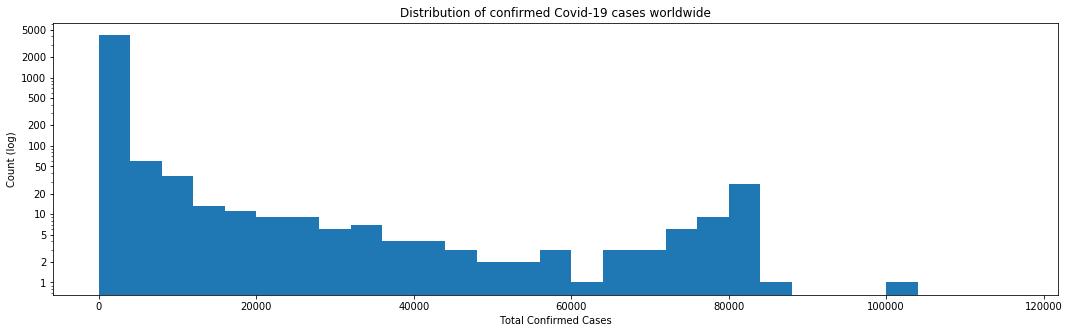

In [50]:
plt.figure(figsize=(18,5))
plt.hist(df.confirmed,log=True, bins=np.arange(0,120000,4000));
yticks = [1,2,5,10,20,50,100,200,500,1000,2000,5000]
plt.yticks(yticks,yticks);
plt.title('Distribution of confirmed Covid-19 cases worldwide')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Count (log)');

## Correlation Between Common Variables

We notice several observations:

- The number of confirmed infections is highly correlated with: the number of deaths, the number of recoveries and the population of the country.
- The number of deaths is also correlated with the number of recovering cases but has a week correlation with the population.
- The median age, density, and percentage of urban population seem to have no effect on any of the cases.

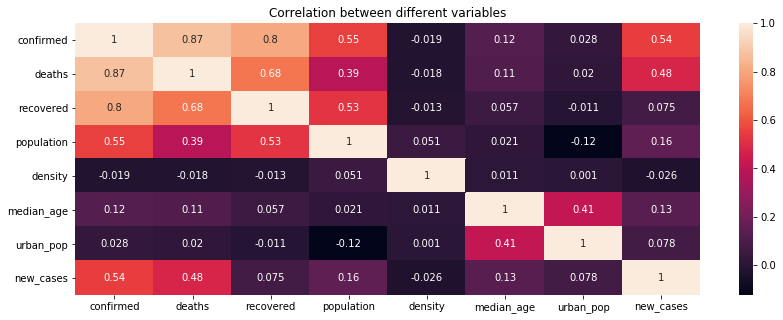

In [57]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(),annot = True);
plt.title('Correlation between different variables');

## Population vs Number of Total Confirmed Cases

The graph below suggests that there is no clear relation between the confirmed infection rates and the population of the country. This could be due to several reasons:

- Measures taken by countries to stop the infection
- Since we can check only 'confirmed' cases. The confirmed variable could be affected by the ability of a country to do tests.
- Some countries do not report the actual confirmed cases they have

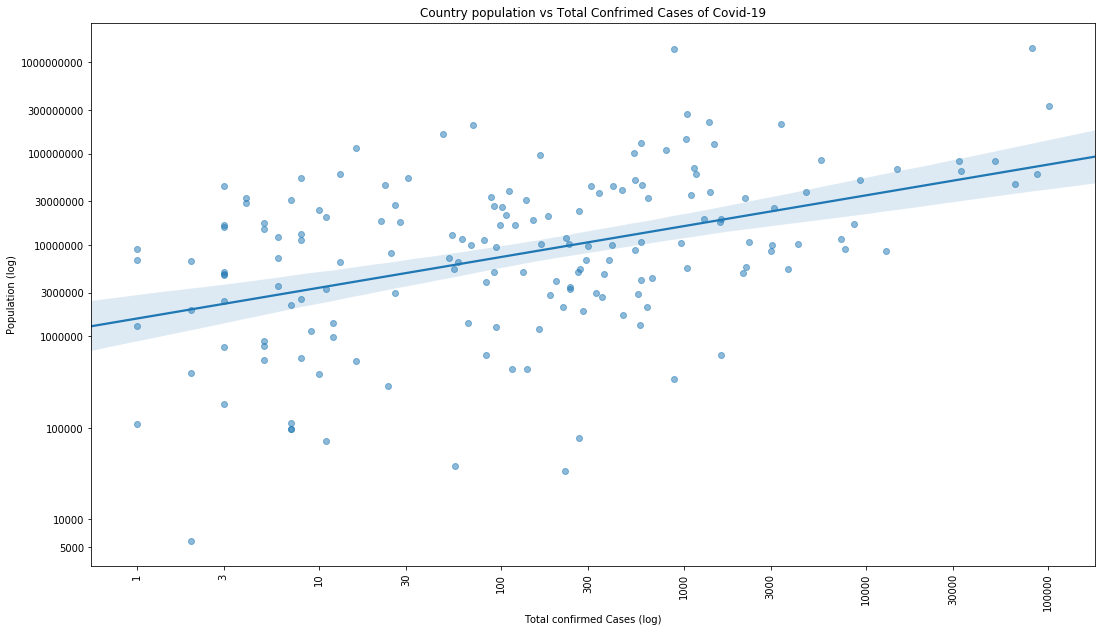

In [64]:
df2 = df.query("date == '2020-03-27'") # lets take a look at just 1 day to avoid duplicate values
df2 = df2[(df2.confirmed != 0) & (df2.population !=0)]
x = np.log10(df2.confirmed)
y = np.log10(df2.population)
plt.figure(figsize=(18,10))
xticks = [1,3,10,30,100,300,1000,3000,10000,30000,100000,300000]
plt.xticks(np.log10(xticks),xticks,rotation=90)
yticks = [5000,10000,100000,1000000,int(3e6),int(1e7),int(3e7),int(1e8),int(3e8),int(1e9),int(3e9)]
plt.yticks(np.log10(yticks),yticks)
sns.regplot(x,y,scatter_kws={'alpha':1/2});

plt.xlabel('Total confirmed Cases (log)')
plt.ylabel('Population (log)')
plt.title('Country population vs Total Confrimed Cases of Covid-19');

## New Cases Vs Total Cases By Country

By comparing the plots, we can see that countries that are doing the worst are all aligned on a line. By comparing the countries on the left (Mar,14) to those on the right (Mar,27), we can predict the countries that are going to do better or worse on the upcoming days. Here are some examples:

- **United States:** In Mar, 14 the United States plot was situated on the 'danger line' like many other countries. In the second plot, we can see how quickly the number of cases increased. Unfortunately, The United States doesn't seem to have dropped from the line in the second plot as well.
- **Italy:** Italy was in the very high right in the first plot. However, in the second plot we can see a noticable improvement.
- **China and South Korea:** They seem to be recovering after a huge battle with the virus.
- **Lebanon:** We can see the position of Lebanon within countries. We can see it performing much better than Egypt but worse than Qatar for example.
- **Turkey:** Turkey was not available in the first plot. But the second plot suggests that it has a huge battle a head.


In [52]:
# add a new column called 'new cases'
# this will count the increase in new cases (per day) instead of the total cumulative value
df2 = df.groupby(['country','date'])['confirmed'].sum().diff()
df2 = df2.reset_index()
df2.loc[df2.confirmed<0,'confirmed'] =0 
df2= df2.fillna(0)
df['new_cases'] = df2['confirmed']

def plot_on_date(interest_date,interest_countries):
    '''
    interest_date: the date we are interested in (yyyy-mm-dd)
    interest_countries: a list of countries we are interested in.
    '''
    df2 = df.query(('date == @interest_date'))
    df2 = df2[(df2.confirmed != 0) & (df2.new_cases !=0)]
    x = np.log10(df2.confirmed)
    y = np.log10(df2.new_cases)
    xticks = [1,3,10,30,100,300,1000,3000,10000,30000,100000,300000]
    plt.xticks(np.log10(xticks),xticks)
    yticks =  [1,3,10,30,100,300,1000,3000,10000,30000]
    plt.yticks(np.log10(yticks),yticks)
    ax = sns.regplot(x,y,scatter_kws={'alpha':0.5},fit_reg=False);
    plt.title(interest_date)
    for i in interest_countries:
        subset = df2.query('country == @i')
        x = np.log10(subset.confirmed) - 0.1
        y = np.log10(subset.new_cases) + 0.1
        ax.text(x,y,i)

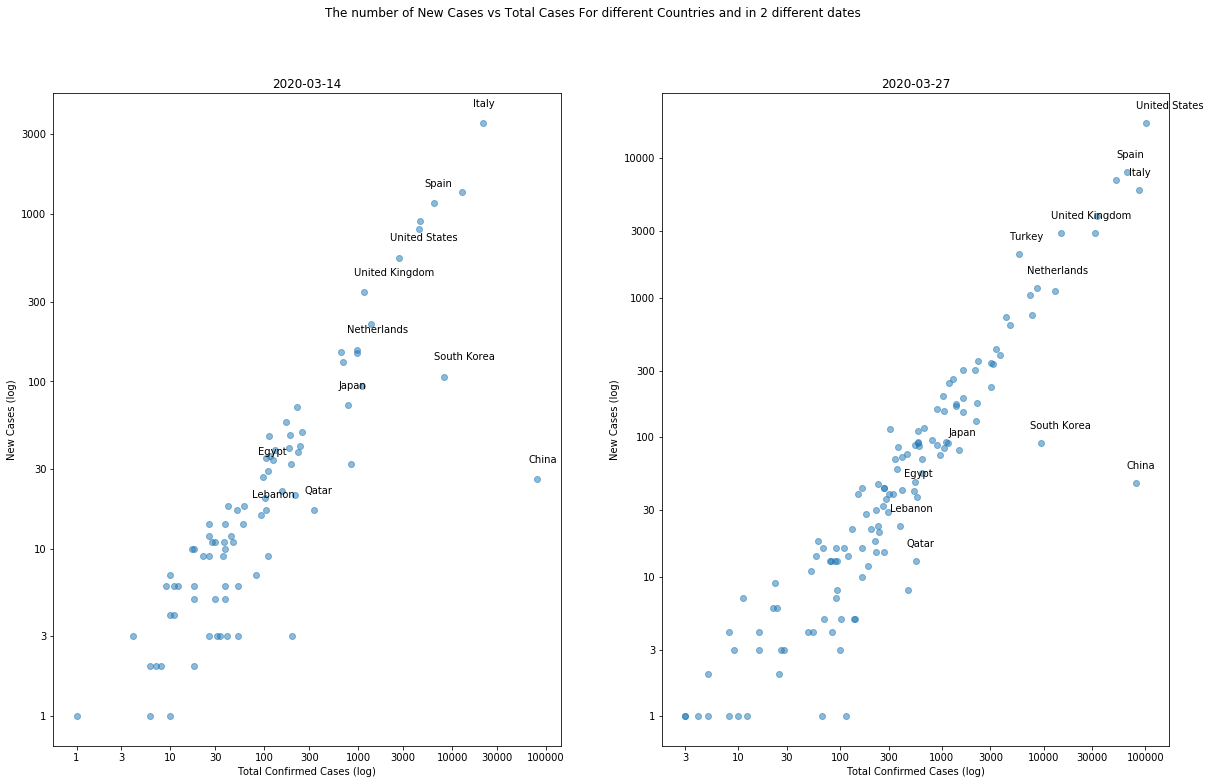

In [61]:
interest_countries = ['United States', 'Italy', 'China', 'Lebanon','Japan','South Korea', 'United Kingdom','Spain','Egypt','Qatar','Netherlands']
interest_countries2 = ['United States', 'Italy', 'China', 'Lebanon','Japan','South Korea', 'United Kingdom','Spain','Egypt','Qatar','Netherlands','Turkey']

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(12)
fig.set_figwidth(20)

plt.subplot(121)
plot_on_date('2020-03-14',interest_countries)
plt.xlabel('Total Confirmed Cases (log)')
plt.ylabel('New Cases (log)')
plt.subplot(122)
plot_on_date('2020-03-27',interest_countries2)
plt.xlabel('Total Confirmed Cases (log)')
plt.ylabel('New Cases (log)')
plt.suptitle('The number of New Cases vs Total Cases For different Countries and in 2 different dates');